In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# loading dataset
df = pd.read_csv("../data/cleaned/cleaned_telco_customer_churn.csv")
df.head()

,CustomerID,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Reason,Calculated Total,Revenue Difference
0,3668-QPYBK,Los Angeles,Male,No,No,No,2,Yes,No,DSL,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Competitor made better offer,107.7,0.45
1,9237-HQITU,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Moved,141.4,10.25
2,9305-CDSKC,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,Moved,797.2,23.30
3,7892-POOKP,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,Moved,2934.4,111.65
4,0280-XJGEX,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,Competitor had better devices,5081.3,45.00


In [4]:
# replacing binary column with 1, 0
df["Partner"] = df["Partner"].replace(["Yes", "No"], [1,0])
df["Senior Citizen"] = df["Senior Citizen"].replace(["Yes", "No"], [1,0])
df["Dependents"] = df["Dependents"].replace(["Yes", "No"], [1,0])
df["Phone Service"] = df["Phone Service"].replace(["Yes", "No"], [1,0])
df["Multiple Lines"] = df["Multiple Lines"].replace(["Yes", "No"], [1,0])
df["Internet Service"] = df["Internet Service"].replace(["Yes", "No"], [1,0])
df["Paperless Billing"] = df["Paperless Billing"].replace(["Yes", "No"], [1,0])

C:\Users\USER\AppData\Local\Temp\ipykernel_20348\1993499619.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Partner"] = df["Partner"].replace(["Yes", "No"], [1,0])
C:\Users\USER\AppData\Local\Temp\ipykernel_20348\1993499619.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Senior Citizen"] = df["Senior Citizen"].replace(["Yes", "No"], [1,0])
C:\Users\USER\AppData\Local\Temp\ipykernel_20348\1993499619.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retai

In [5]:
# internet services count
service_cols = [
    "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Streaming Movies"
]

df["Total Internet Services"] = df[service_cols].apply(lambda x: (x=="Yes").sum(), axis=1)

In [12]:
df.head()

,CustomerID,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Reason,Calculated Total,Revenue Difference,Total Internet Services
0,3668-QPYBK,Los Angeles,Male,0,0,0,2,1,0,DSL,...,Month-to-month,1,Mailed check,53.85,108.15,1,Competitor made better offer,107.7,0.45,2
1,9237-HQITU,Los Angeles,Female,0,0,1,2,1,0,Fiber optic,...,Month-to-month,1,Electronic check,70.70,151.65,1,Moved,141.4,10.25,0
2,9305-CDSKC,Los Angeles,Female,0,0,1,8,1,1,Fiber optic,...,Month-to-month,1,Electronic check,99.65,820.50,1,Moved,797.2,23.30,3
3,7892-POOKP,Los Angeles,Female,0,1,1,28,1,1,Fiber optic,...,Month-to-month,1,Electronic check,104.80,3046.05,1,Moved,2934.4,111.65,4
4,0280-XJGEX,Los Angeles,Male,0,0,1,49,1,1,Fiber optic,...,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,Competitor had better devices,5081.3,45.00,4


In [6]:
# Average Revenue Per Month
df["Avg Revenue Per Month"] = df["Total Charges"] / (df["Tenure Months"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               7032 non-null   object 
 1   City                     7032 non-null   object 
 2   Gender                   7032 non-null   object 
 3   Senior Citizen           7032 non-null   int64  
 4   Partner                  7032 non-null   int64  
 5   Dependents               7032 non-null   int64  
 6   Tenure Months            7032 non-null   int64  
 7   Phone Service            7032 non-null   int64  
 8   Multiple Lines           7032 non-null   int64  
 9   Internet Service         7032 non-null   object 
 10  Online Security          7032 non-null   object 
 11  Online Backup            7032 non-null   object 
 12  Device Protection        7032 non-null   object 
 13  Tech Support             7032 non-null   object 
 14  Streaming TV            

In [15]:
req_features = [
    "City",
    "Gender",
    "Senior Citizen",
    "Partner",
    "Dependents",
    "Tenure Months",
    "Phone Service",
    "Multiple Lines",
    "Internet Service",
    "Total Internet Services",
    "Contract",
    "Payment Method",
    "Total Charges",
    "Churn Value",
    
]

model_df = df[req_features]
model_df.head()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Total Internet Services,Contract,Payment Method,Total Charges,Churn Value
0,Los Angeles,Male,0,0,0,2,1,0,DSL,2,Month-to-month,Mailed check,108.15,1
1,Los Angeles,Female,0,0,1,2,1,0,Fiber optic,0,Month-to-month,Electronic check,151.65,1
2,Los Angeles,Female,0,0,1,8,1,1,Fiber optic,3,Month-to-month,Electronic check,820.50,1
3,Los Angeles,Female,0,1,1,28,1,1,Fiber optic,4,Month-to-month,Electronic check,3046.05,1
4,Los Angeles,Male,0,0,1,49,1,1,Fiber optic,4,Month-to-month,Bank transfer (automatic),5036.30,1


In [8]:
numeric_cols = df.select_dtypes(include="number")
churn_corr = numeric_cols.corr()["Churn Value"].sort_values(ascending=False)
churn_corr= churn_corr.to_frame()

churn_corr

,Churn Value
Churn Value,1.000000
Monthly Charges,0.192858
Avg Revenue Per Month,0.192033
Paperless Billing,0.191454
Senior Citizen,0.150541
Multiple Lines,0.040033
Phone Service,0.011691
Total Internet Services,-0.087882
Revenue Difference,-0.141167
Partner,-0.149982


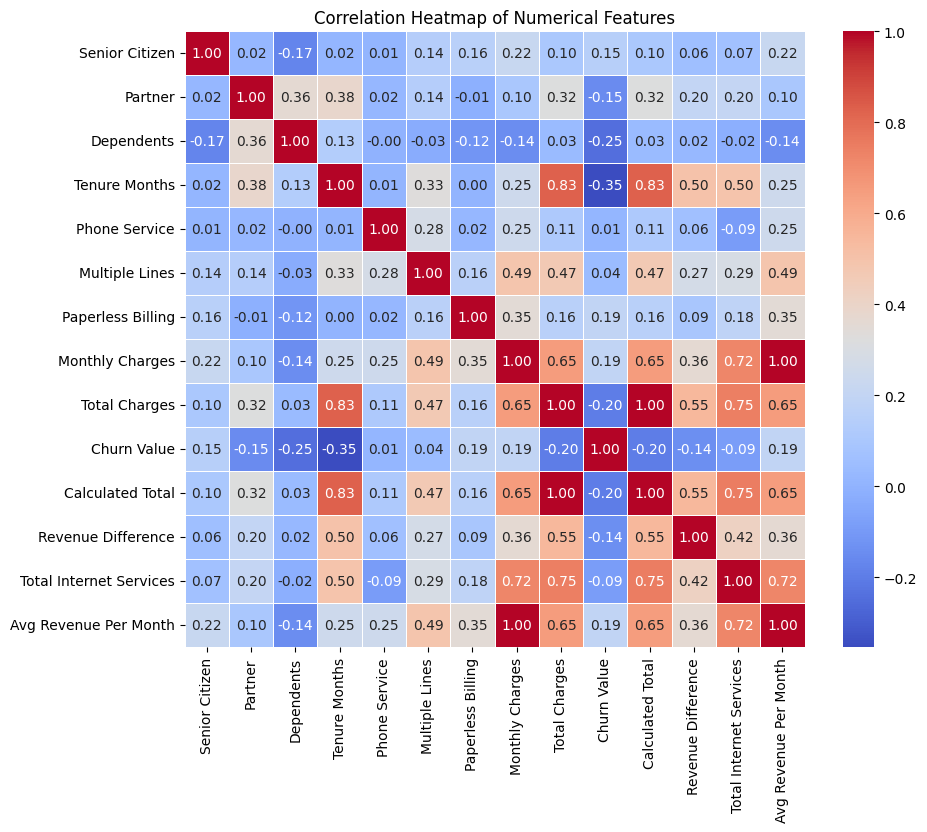

In [11]:

# select numerical columns
num_df = df.select_dtypes(include=["int64", "float64"])
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [16]:
model_df.to_csv("../data/cleaned/model_telco_customer_churn.csv", index=False)